In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# v15 combined model
g_df = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters_with_combined_net_testing_metrics.csv')
r_df = pd.read_csv('/data/HSC/HSC_v6/step1/r_band_sextractor/shape_parameters_with_combined_net_testing_metrics.csv')
i_df = pd.read_csv('/data/HSC/HSC_v6/step1/i_band_sextractor/shape_parameters_with_combined_net_testing_metrics.csv')
z_df = pd.read_csv('/data/HSC/HSC_v6/step1/z_band_sextractor/shape_parameters_with_combined_net_testing_metrics.csv')
y_df = pd.read_csv('/data/HSC/HSC_v6/step1/y_band_sextractor/shape_parameters_with_combined_net_testing_metrics.csv')
cnn_df = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters_with_CNN_testing_metrics.csv')
nn_df = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters_with_NN_testing_metrics.csv')

In [4]:
metrics = ["bias", "outlier_rate", "loss", "rmse"]
metric_names = ['Bias', 'Outlier Rate', 'Loss', 'RMSE']
# shape_params = ["SPHEROID_SERSICN", "ISOAREA_IMAGE", "FLUX_RADIUS", "MU_MAX", "ELLIPTICITY", "A_IMAGE", "B_IMAGE"]
# shape_param_names = ['Sérsic Index', 'Isophotal Area', 'Half-Light Radius', 'Max Surface Brightness', 'Ellipticity', 'Major Axis', 'Minor Axis']
shape_params = ["SPHEROID_SERSICN", "ISOAREA_IMAGE", "ELLIPTICITY"]
shape_param_names = ['Sérsic Index', 'Isophotal Area', 'Ellipticity']
models = [g_df, cnn_df, nn_df]
model_names = ['Multi-Modal NN', 'CNN', 'MLP']

In [5]:
df_list = [g_df, r_df, i_df, z_df, y_df]

colors = ['green', 'red', 'blue', 'orange', 'purple']
bands = ['g', 'r', 'i', 'z', 'y']

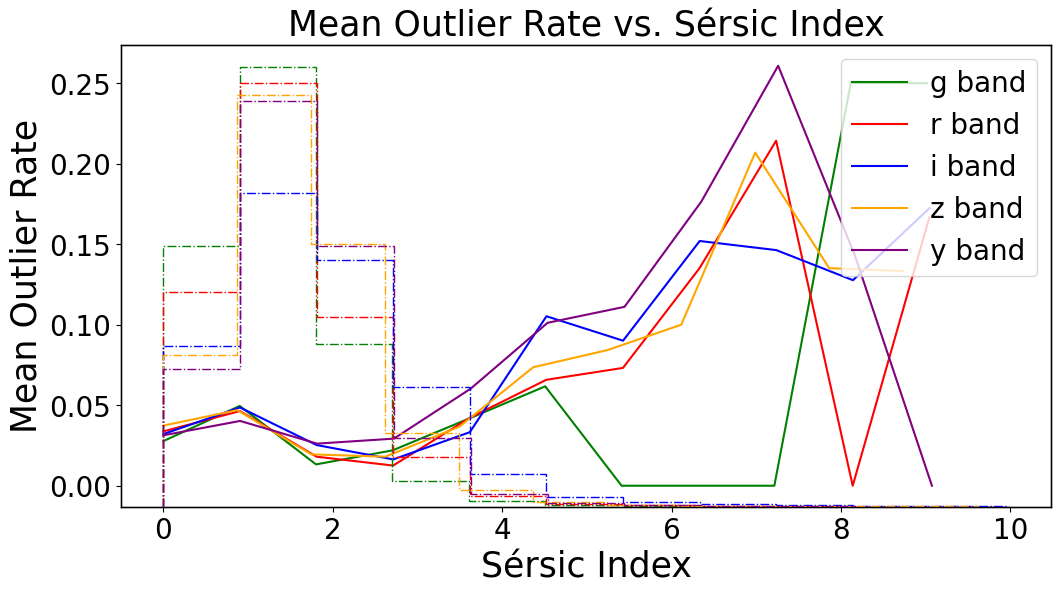

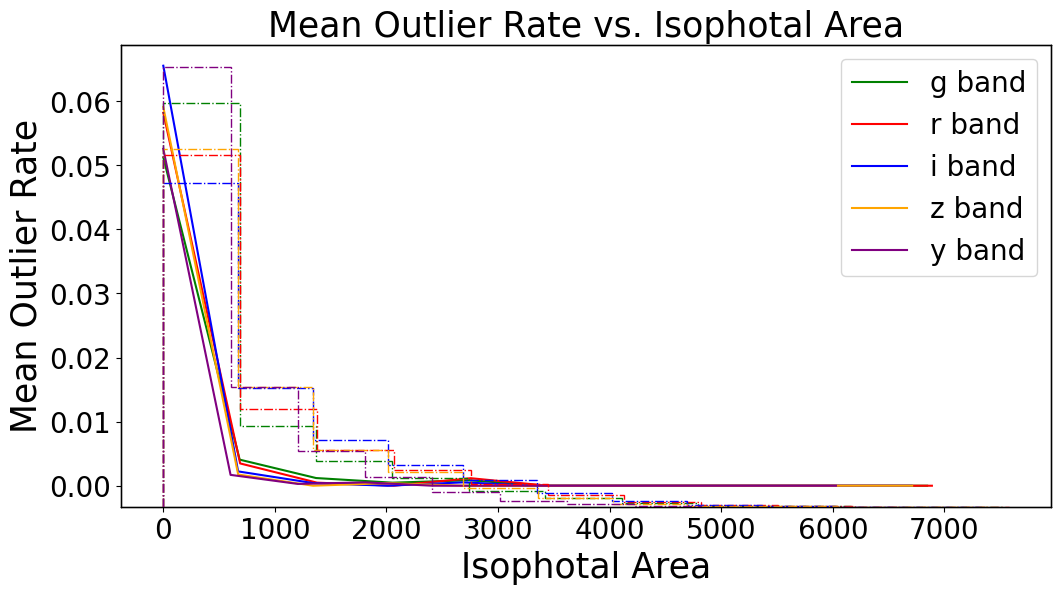

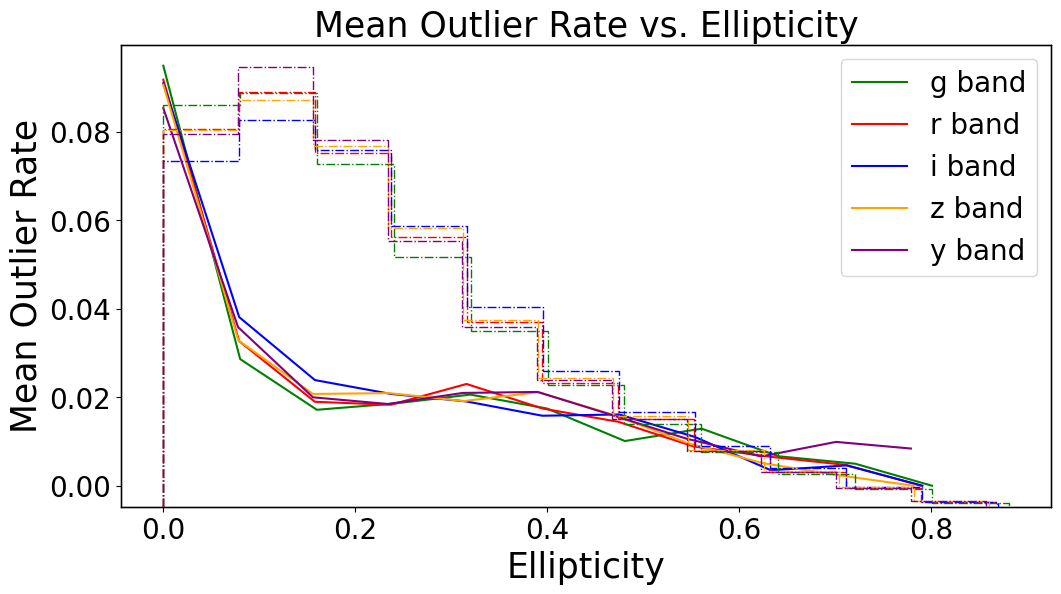

In [6]:
NBINS = 10
for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    for j, df in enumerate(df_list):
        nbins = NBINS + 1
        step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
        bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
        df[f'{shape_param}_bins'] = pd.cut(df[shape_param], bins=bins)
        bin_mean = df.groupby(f'{shape_param}_bins')['outlier_rate'].mean()
        axs.plot(bin_mean.index.to_series().apply(lambda x: x.left), bin_mean.values, color=colors[j], linestyle='solid', label=f'{bands[j]} band')
        twin_ax = axs.twinx()
        twin_ax.hist(df[shape_param], bins=bins, color=colors[j], density=True, label=f'{bands[j]} band', histtype='step', linestyle='dashdot')
        twin_ax.yaxis.set_visible(False)
        if j > 0:
            twin_ax.get_shared_y_axes().join(prev_twin_ax, twin_ax)
        prev_twin_ax = twin_ax
        
        
    axs.legend(loc='upper right', fontsize=20)
    axs.set_title(f'Mean Outlier Rate vs. {shape_param_names[i]}', fontsize=25)
    axs.set_xlabel(shape_param_names[i], fontsize=25)
    axs.set_ylabel('Mean Outlier Rate', fontsize=25)
    axs.tick_params(axis='x', labelsize=20)
    axs.tick_params(axis='y', labelsize=20)
    plt.show()

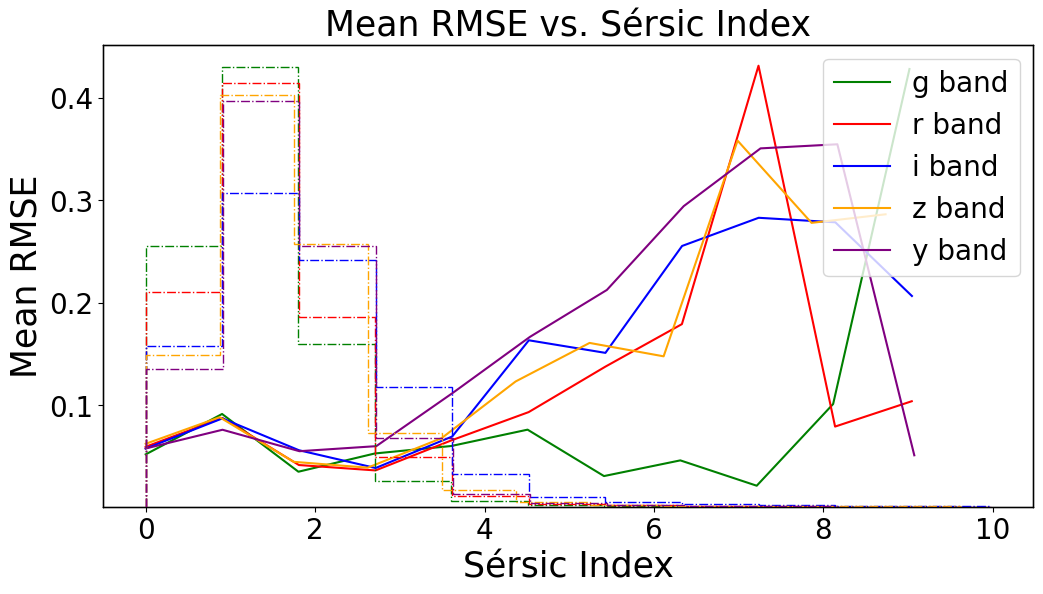

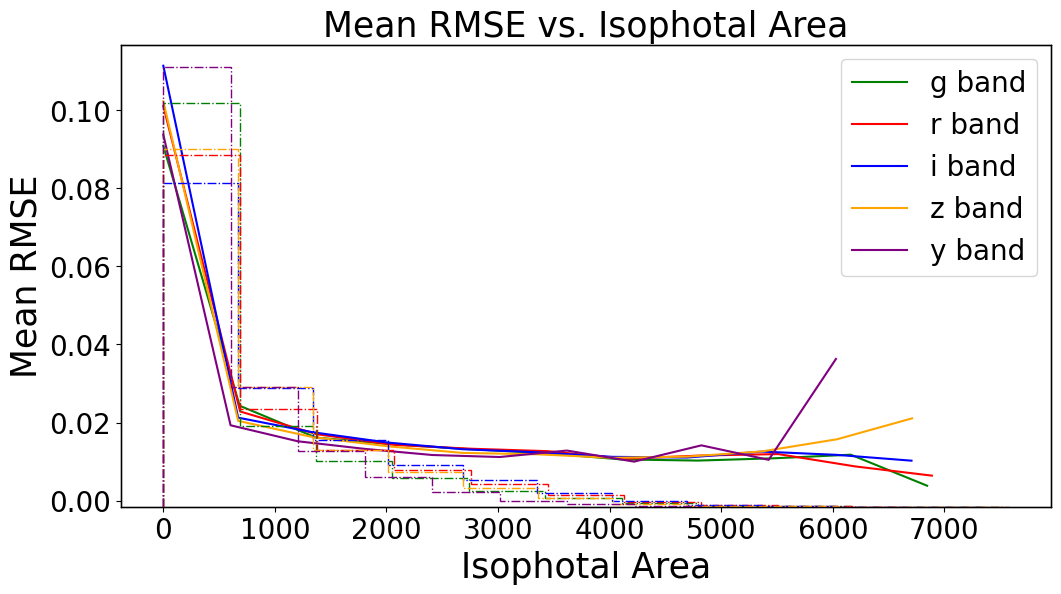

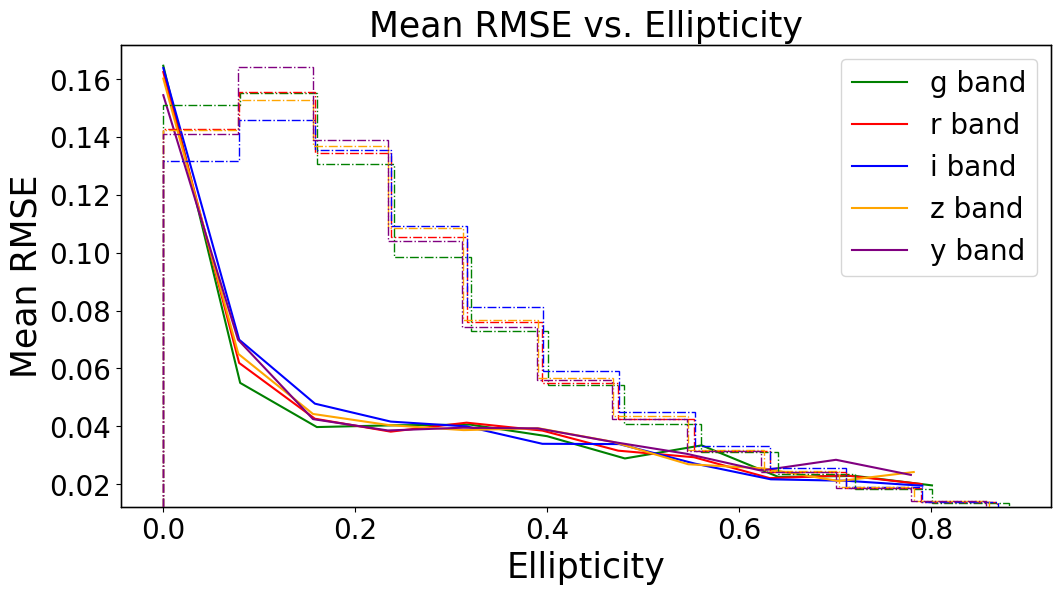

In [7]:
NBINS = 10
for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    for j, df in enumerate(df_list):
        nbins = NBINS + 1
        step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
        bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
        df[f'{shape_param}_bins'] = pd.cut(df[shape_param], bins=bins)
        bin_mean = df.groupby(f'{shape_param}_bins')['rmse'].mean()
        axs.plot(bin_mean.index.to_series().apply(lambda x: x.left), bin_mean.values, color=colors[j], linestyle='solid', label=f'{bands[j]} band')
        twin_ax = axs.twinx()
        twin_ax.hist(df[shape_param], bins=bins, color=colors[j], density=True, label=f'{bands[j]} band', histtype='step', linestyle='dashdot')
        twin_ax.yaxis.set_visible(False)
        if j > 0:
            twin_ax.get_shared_y_axes().join(prev_twin_ax, twin_ax)
        prev_twin_ax = twin_ax
        
        
    axs.legend(loc='upper right', fontsize=20)
    axs.set_title(f'Mean RMSE vs. {shape_param_names[i]}', fontsize=25)
    axs.set_xlabel(shape_param_names[i], fontsize=25)
    axs.set_ylabel('Mean RMSE', fontsize=25)
    axs.tick_params(axis='x', labelsize=20)
    axs.tick_params(axis='y', labelsize=20)
    plt.show()

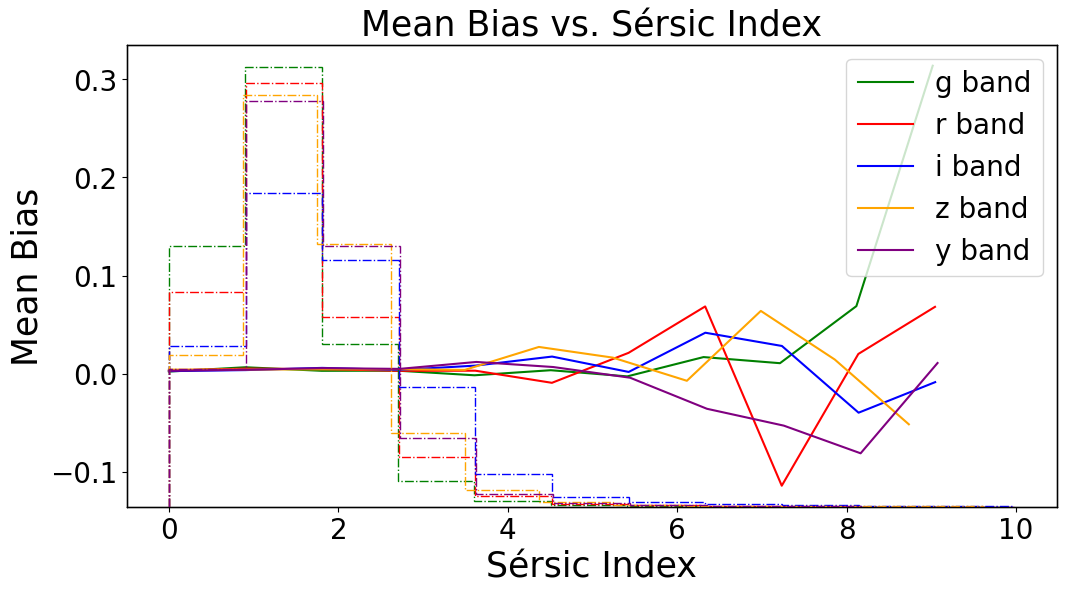

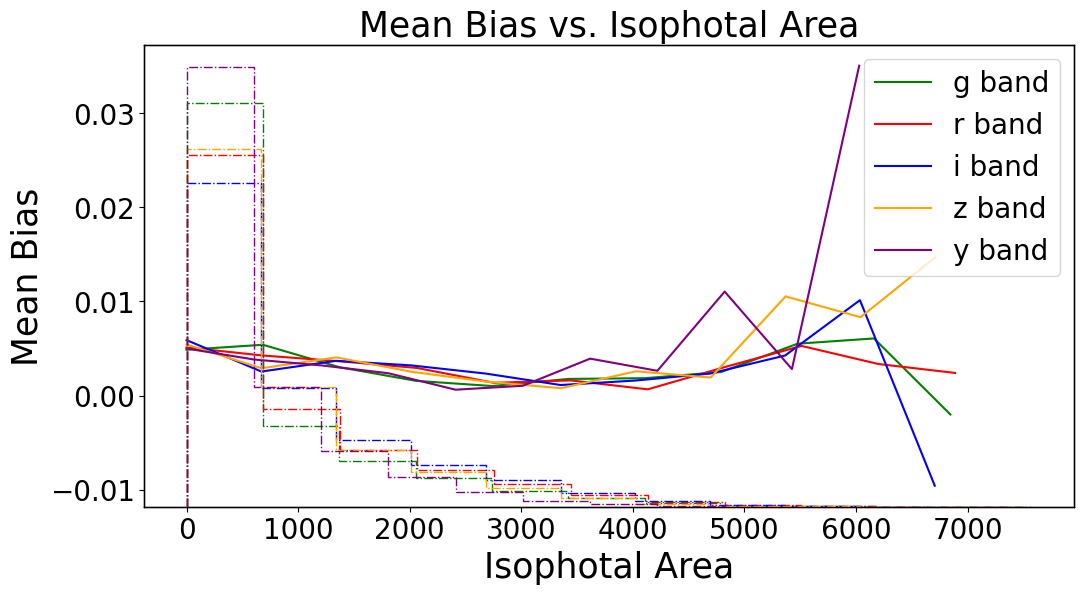

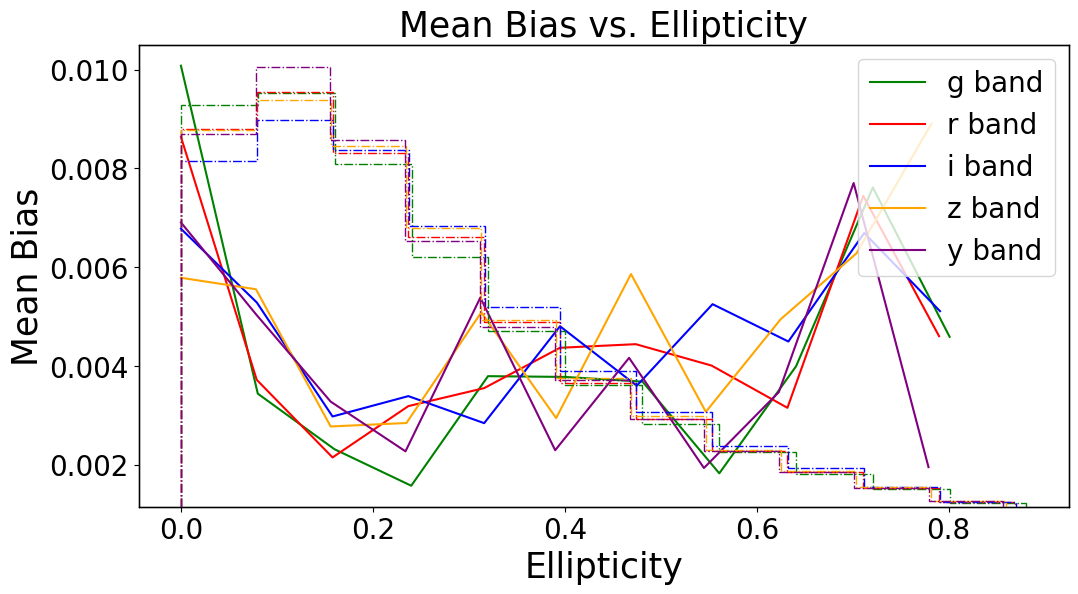

In [8]:
NBINS = 10
for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    for j, df in enumerate(df_list):
        nbins = NBINS + 1
        step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
        bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
        df[f'{shape_param}_bins'] = pd.cut(df[shape_param], bins=bins)
        bin_mean = df.groupby(f'{shape_param}_bins')['bias'].mean()
        axs.plot(bin_mean.index.to_series().apply(lambda x: x.left), bin_mean.values, color=colors[j], linestyle='solid', label=f'{bands[j]} band')
        twin_ax = axs.twinx()
        twin_ax.hist(df[shape_param], bins=bins, color=colors[j], density=True, label=f'{bands[j]} band', histtype='step', linestyle='dashdot')
        twin_ax.yaxis.set_visible(False)
        if j > 0:
            twin_ax.get_shared_y_axes().join(prev_twin_ax, twin_ax)
        prev_twin_ax = twin_ax
        
        
    axs.legend(loc='upper right', fontsize=20)
    axs.set_title(f'Mean Bias vs. {shape_param_names[i]}', fontsize=25)
    axs.set_xlabel(shape_param_names[i], fontsize=25)
    axs.set_ylabel('Mean Bias', fontsize=25)
    axs.tick_params(axis='x', labelsize=20)
    axs.tick_params(axis='y', labelsize=20)
    plt.show()

In [9]:
df = g_df  # pick one dataframe to plot
noncrowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] <= 1]
crowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] > 1]

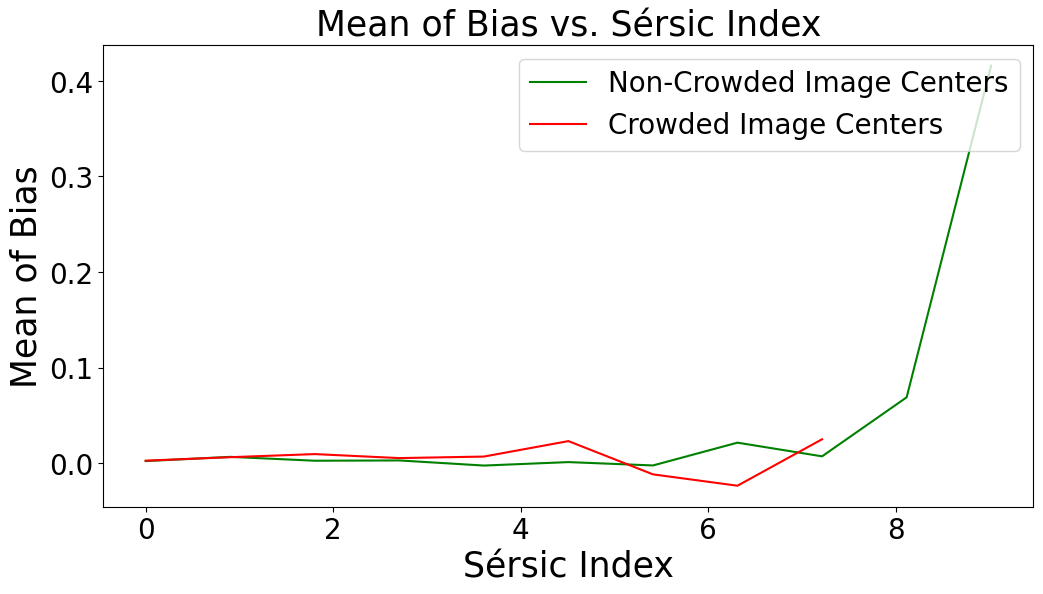

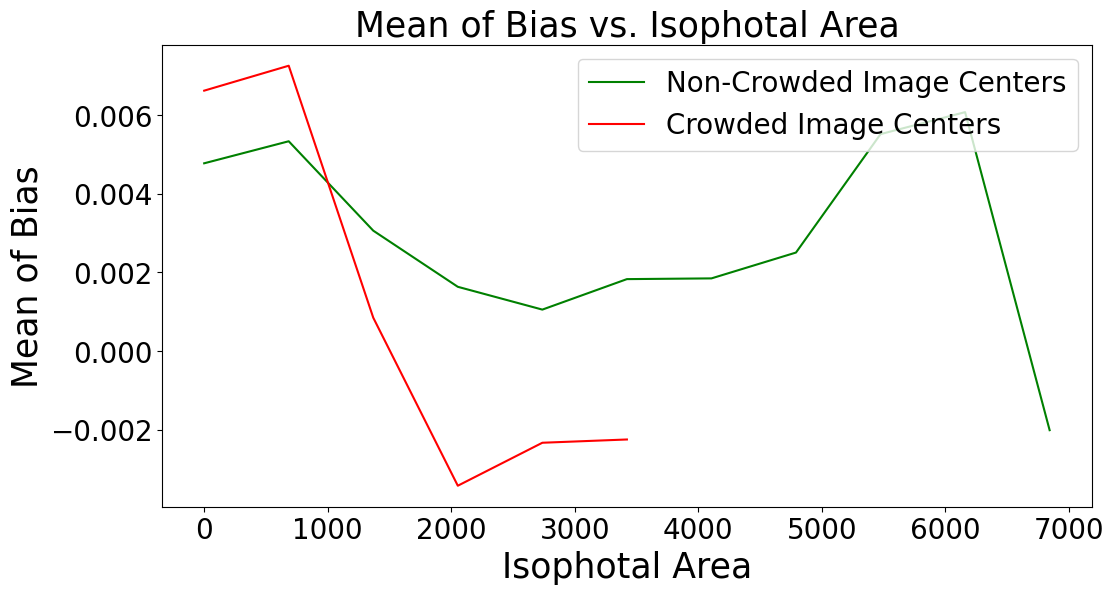

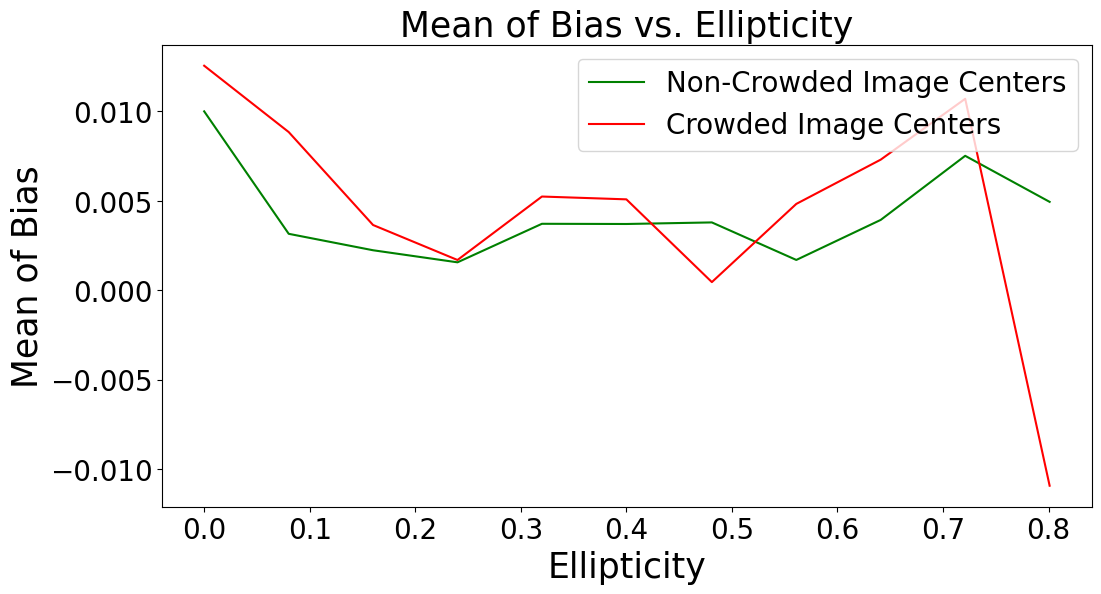

In [10]:
df = g_df  # pick one dataframe to plot
noncrowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] <= 1]
crowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] > 1]

NBINS = 10

for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    nbins = NBINS + 1
    step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
    bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
    noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
    crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)
    noncrowded_bin_mean = noncrowded_df.groupby(f'{shape_param}_bins')['bias'].mean()
    crowded_bin_mean = crowded_df.groupby(f'{shape_param}_bins')['bias'].mean()
    axs.plot(noncrowded_bin_mean.index.to_series().apply(lambda x: x.left), noncrowded_bin_mean.values, color=colors[0], label='Non-Crowded Image Centers')
    axs.plot(crowded_bin_mean.index.to_series().apply(lambda x: x.left), crowded_bin_mean.values, color=colors[1], label='Crowded Image Centers')
    axs.legend(loc='upper right', fontsize=20)
    axs.set_title(f'Mean of Bias vs. {shape_param_names[i]}', fontsize=25)
    axs.set_xlabel(shape_param_names[i], fontsize=25)
    axs.set_ylabel(f'Mean of Bias', fontsize=25)
    axs.tick_params(axis='x', labelsize=20)
    axs.tick_params(axis='y', labelsize=20)
    plt.show()

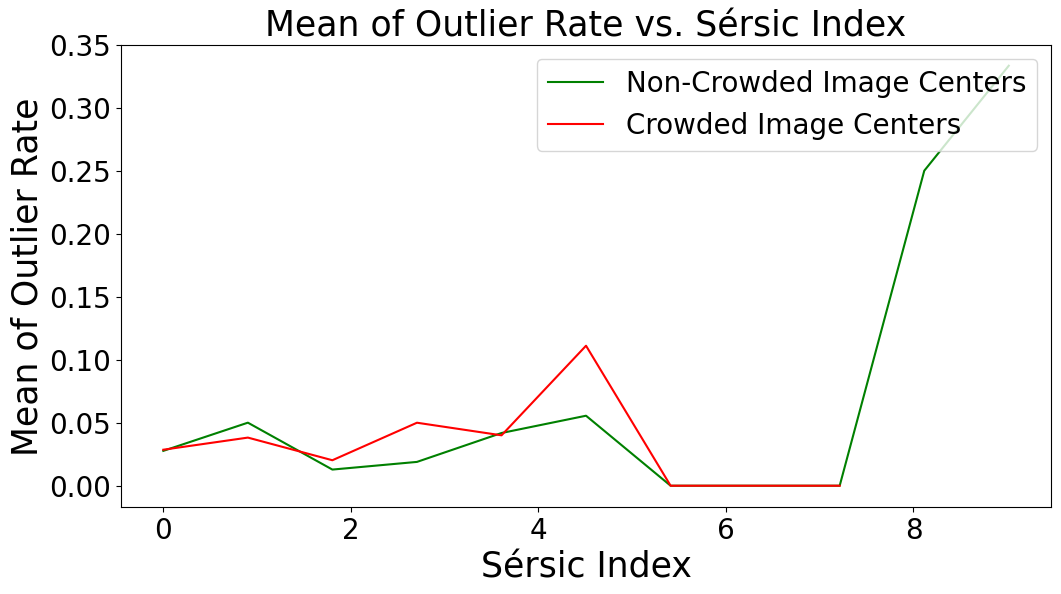

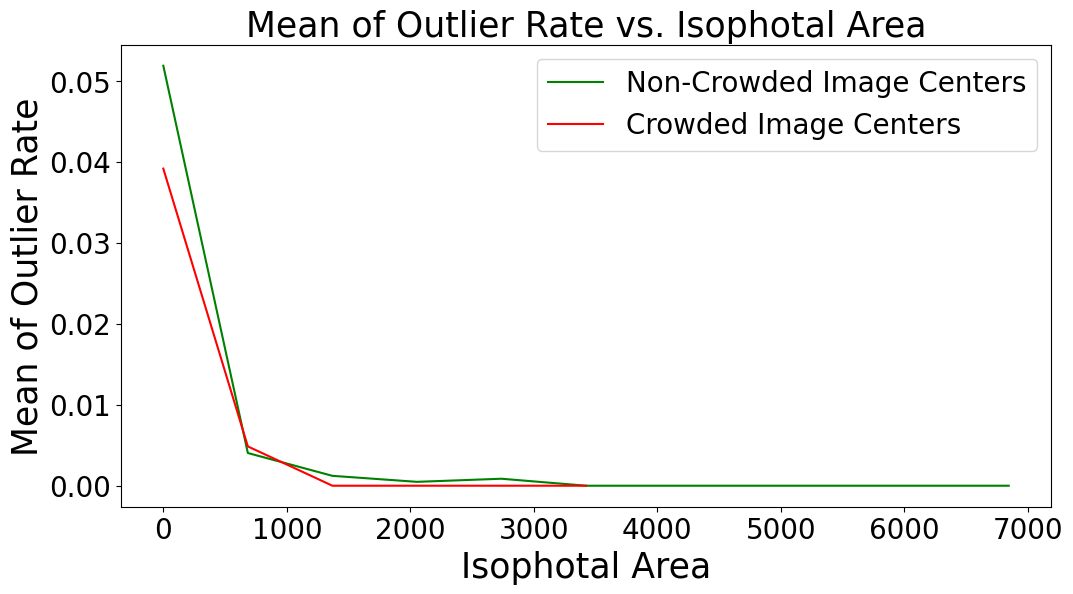

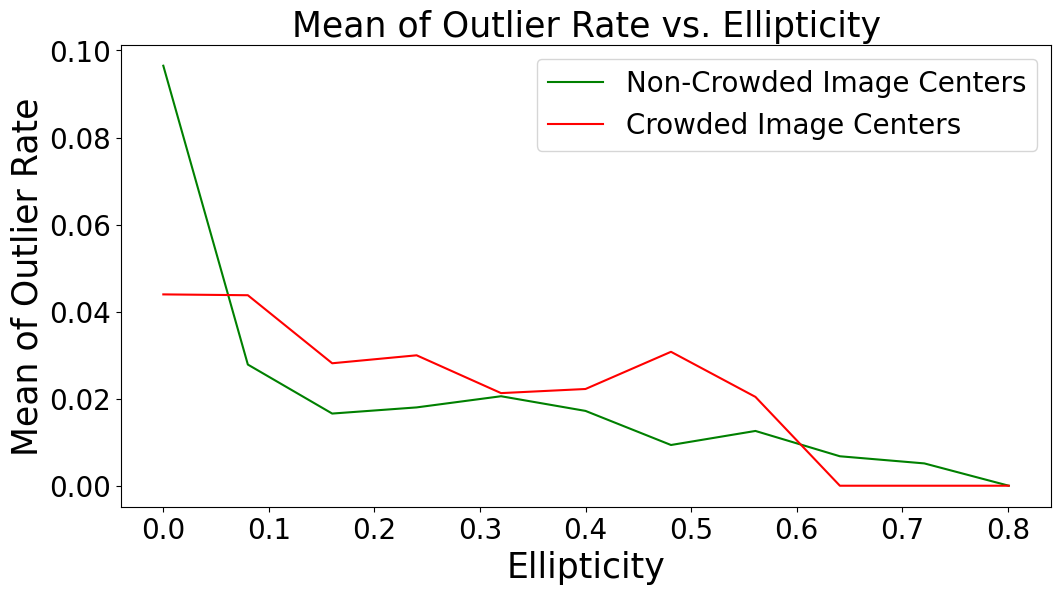

In [11]:
df = g_df  # pick one dataframe to plot
noncrowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] <= 1]
crowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] > 1]

NBINS = 10
for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    nbins = NBINS + 1
    step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
    bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
    noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
    crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)
    noncrowded_bin_mean = noncrowded_df.groupby(f'{shape_param}_bins')['outlier_rate'].mean()
    crowded_bin_mean = crowded_df.groupby(f'{shape_param}_bins')['outlier_rate'].mean()
    axs.plot(noncrowded_bin_mean.index.to_series().apply(lambda x: x.left), noncrowded_bin_mean.values, color=colors[0], label='Non-Crowded Image Centers')
    axs.plot(crowded_bin_mean.index.to_series().apply(lambda x: x.left), crowded_bin_mean.values, color=colors[1], label='Crowded Image Centers')
    axs.legend(loc='upper right', fontsize=20)
    axs.set_title(f'Mean of Outlier Rate vs. {shape_param_names[i]}', fontsize=25)
    axs.set_xlabel(shape_param_names[i], fontsize=25)
    axs.set_ylabel(f'Mean of Outlier Rate', fontsize=25)
    axs.tick_params(axis='x', labelsize=20)
    axs.tick_params(axis='y', labelsize=20)
    plt.show()

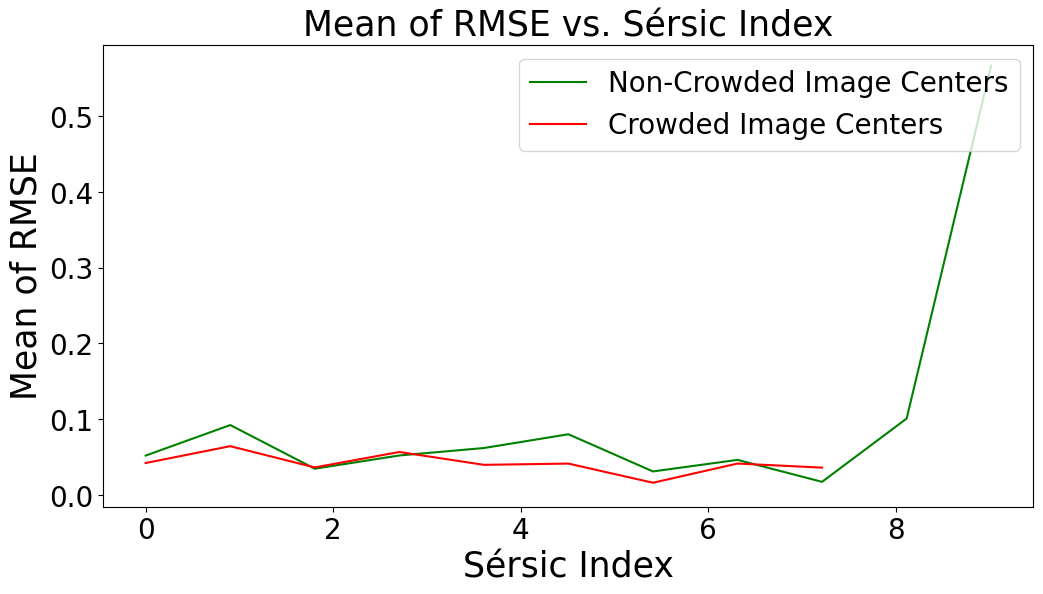

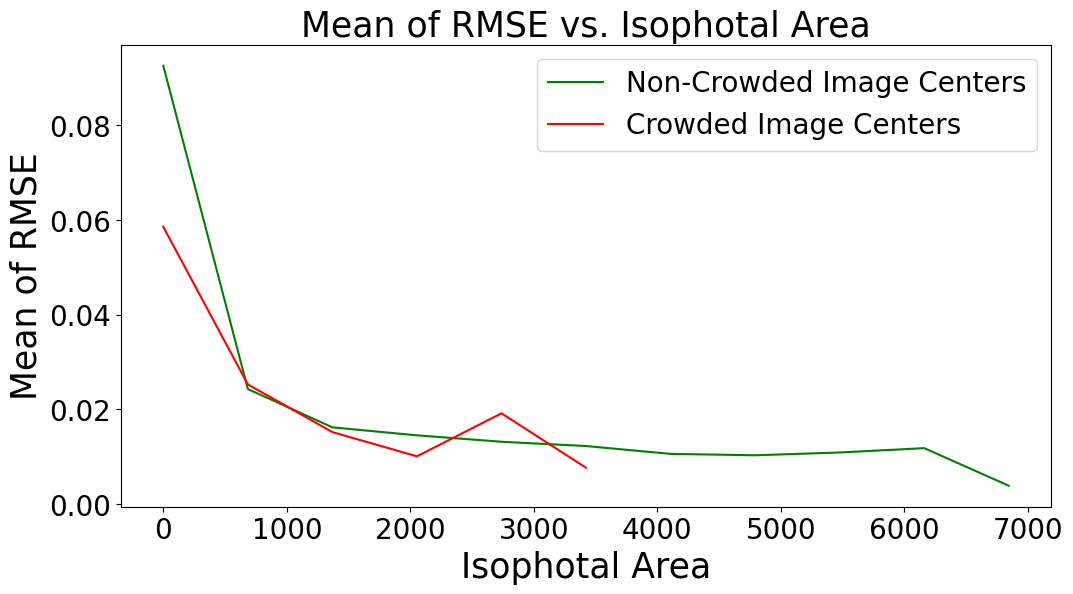

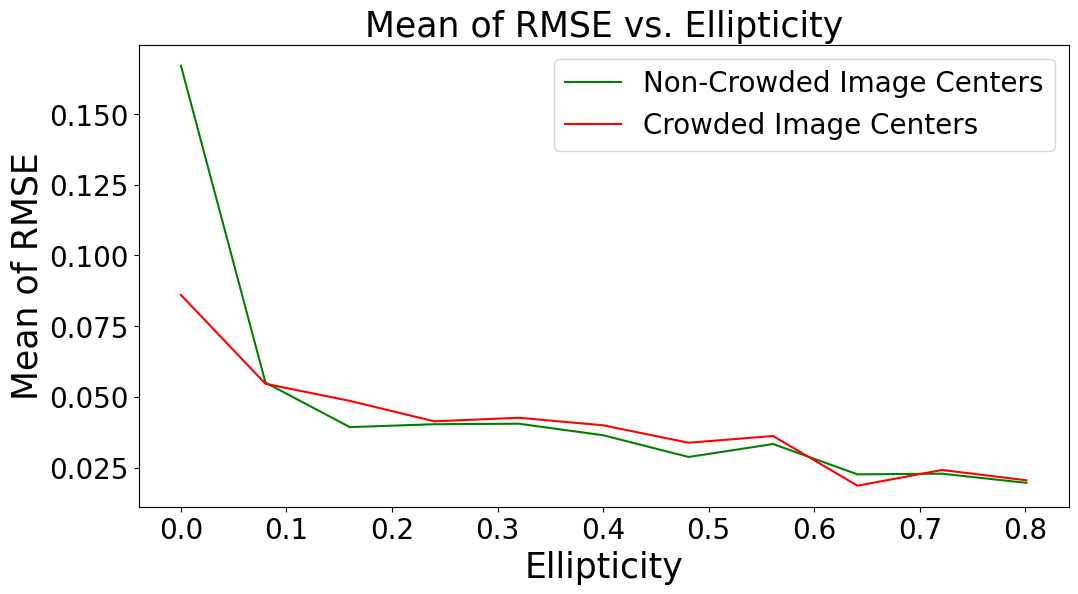

In [12]:
df = g_df  # pick one dataframe to plot
noncrowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] <= 1]
crowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] > 1]

NBINS = 10

for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    nbins = NBINS + 1
    step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
    bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
    noncrowded_df[f'{shape_param}_bins'] = pd.cut(noncrowded_df[shape_param], bins=bins)
    crowded_df[f'{shape_param}_bins'] = pd.cut(crowded_df[shape_param], bins=bins)
    noncrowded_bin_mean = noncrowded_df.groupby(f'{shape_param}_bins')['rmse'].mean()
    crowded_bin_mean = crowded_df.groupby(f'{shape_param}_bins')['rmse'].mean()
    axs.plot(noncrowded_bin_mean.index.to_series().apply(lambda x: x.left), noncrowded_bin_mean.values, color=colors[0], label='Non-Crowded Image Centers')
    axs.plot(crowded_bin_mean.index.to_series().apply(lambda x: x.left), crowded_bin_mean.values, color=colors[1], label='Crowded Image Centers')
    axs.legend(loc='upper right', fontsize=20)
    axs.set_title(f'Mean of RMSE vs. {shape_param_names[i]}', fontsize=25)
    axs.set_xlabel(shape_param_names[i], fontsize=25)
    axs.set_ylabel(f'Mean of RMSE', fontsize=25)
    axs.tick_params(axis='x', labelsize=20)
    axs.tick_params(axis='y', labelsize=20)
    plt.show()

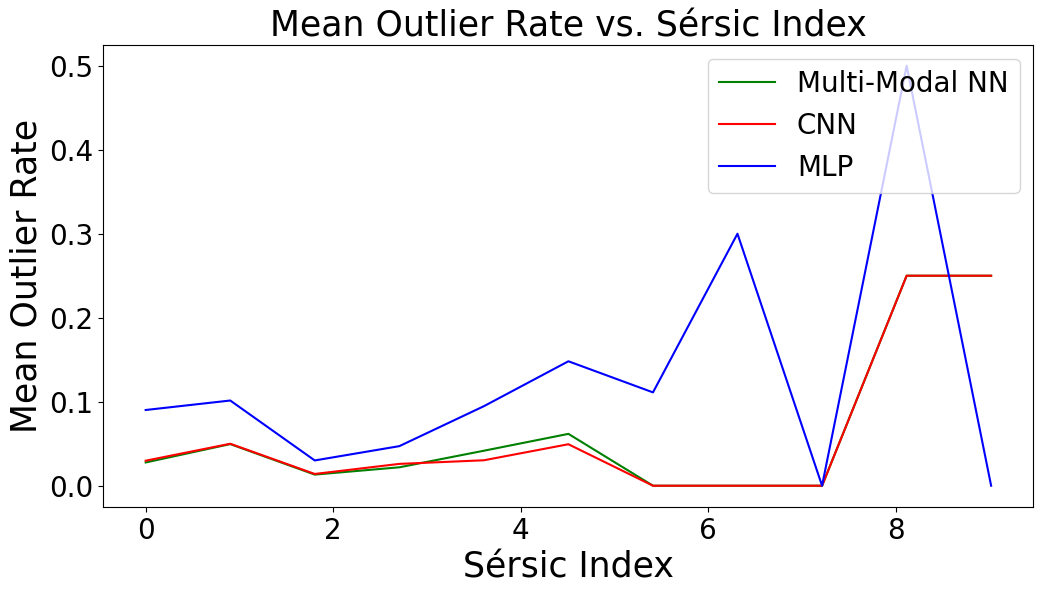

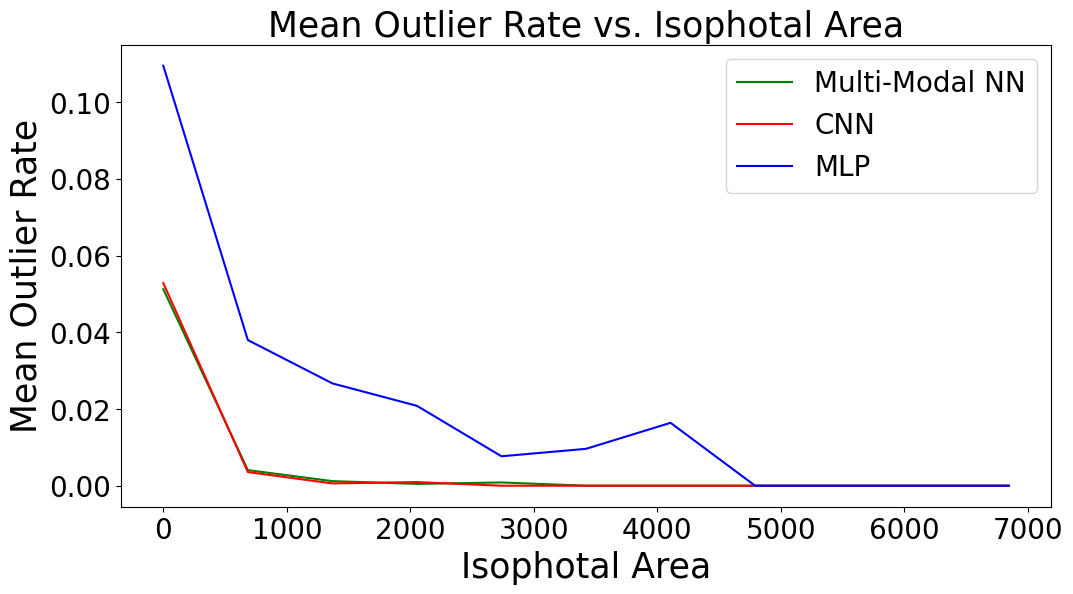

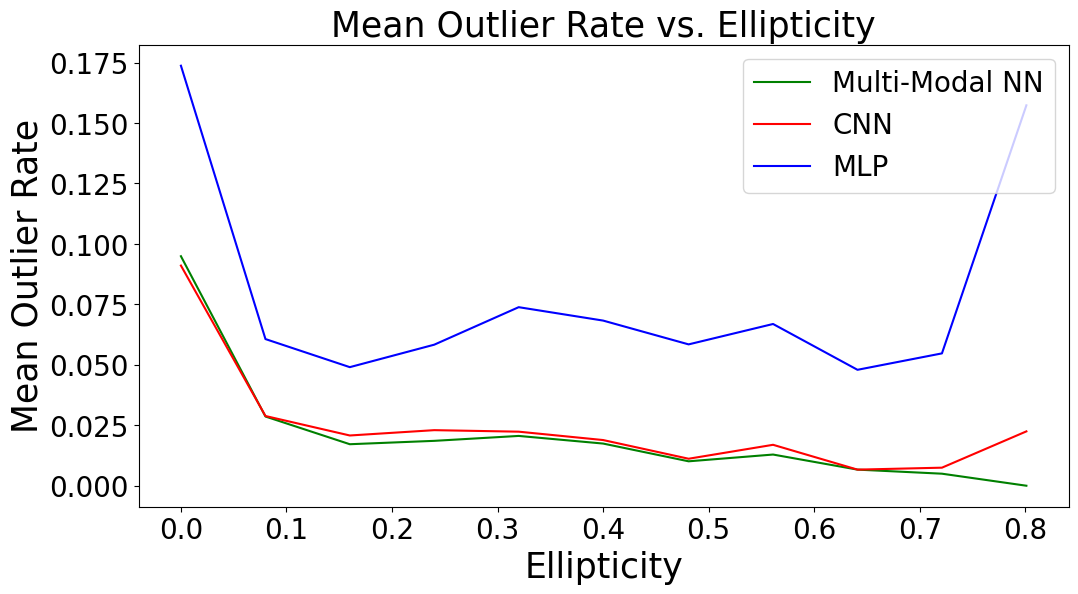

In [13]:
NBINS = 10
for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    for j, df in enumerate(models):
        nbins = NBINS + 1
        step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
        bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
        df[f'{shape_param}_bins'] = pd.cut(df[shape_param], bins=bins)
        bin_mean = df.groupby(f'{shape_param}_bins')['outlier_rate'].mean()
        axs.plot(bin_mean.index.to_series().apply(lambda x: x.left), bin_mean.values, color=colors[j], linestyle='solid', label=f'{model_names[j]}')
        
    axs.legend(loc='upper right', fontsize=20)
    axs.set_title(f'Mean Outlier Rate vs. {shape_param_names[i]}', fontsize=25)
    axs.set_xlabel(shape_param_names[i], fontsize=25)
    axs.set_ylabel('Mean Outlier Rate', fontsize=25)
    axs.tick_params(axis='x', labelsize=20)
    axs.tick_params(axis='y', labelsize=20)
    plt.show()

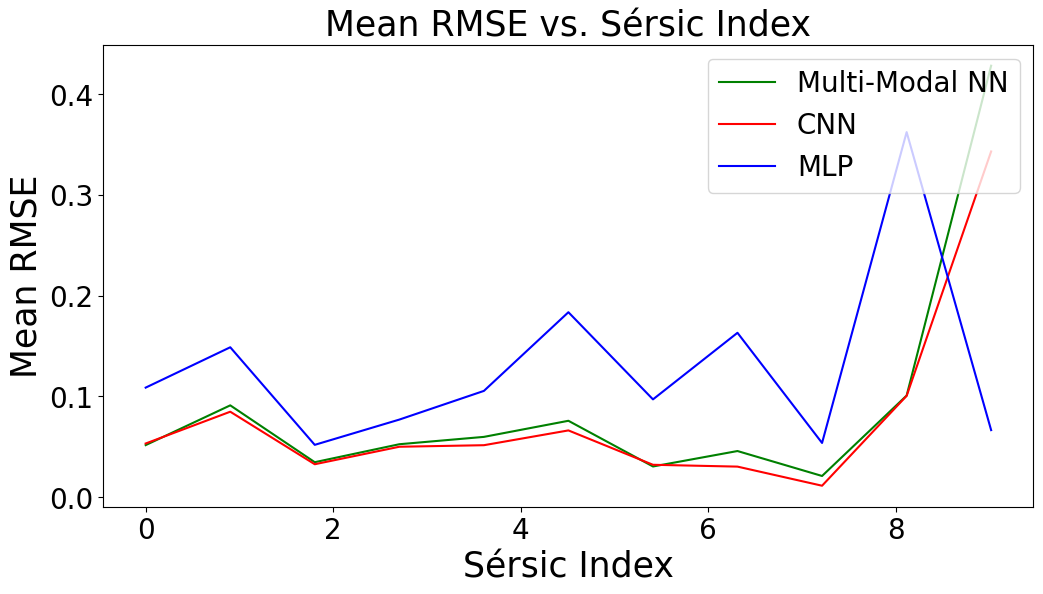

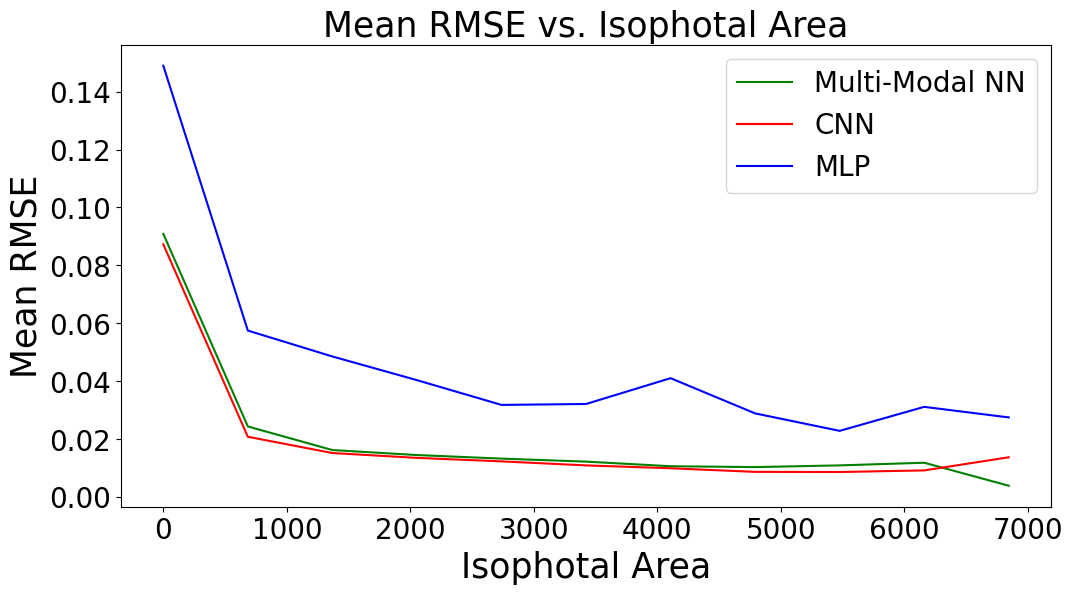

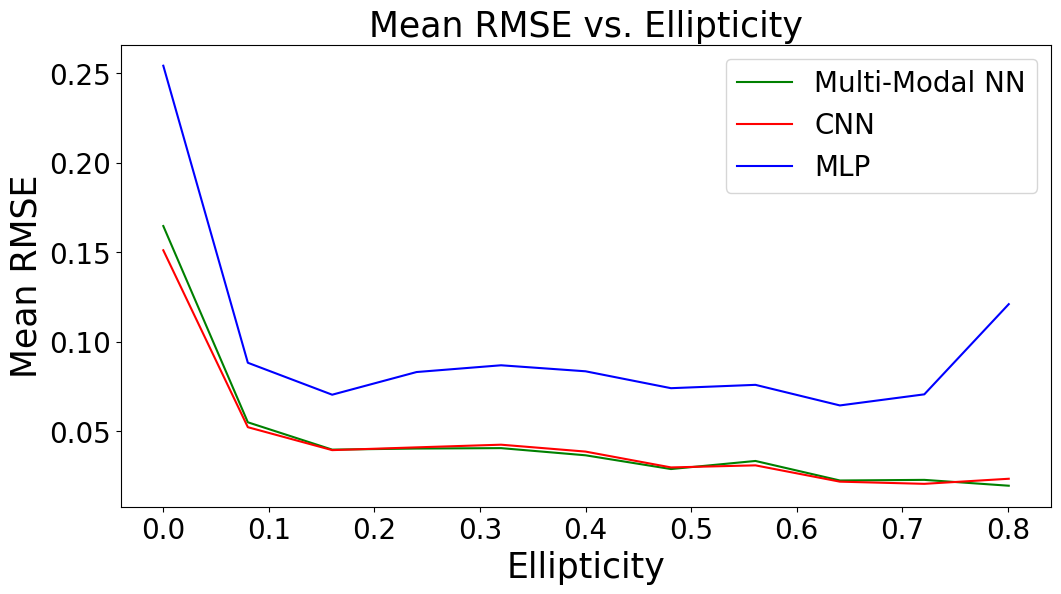

In [14]:
NBINS = 10
for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    for j, df in enumerate(models):
        nbins = NBINS + 1
        step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
        bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
        df[f'{shape_param}_bins'] = pd.cut(df[shape_param], bins=bins)
        bin_mean = df.groupby(f'{shape_param}_bins')['rmse'].mean()
        axs.plot(bin_mean.index.to_series().apply(lambda x: x.left), bin_mean.values, color=colors[j], linestyle='solid', label=f'{model_names[j]}')
        
    axs.legend(loc='upper right', fontsize=20)
    axs.set_title(f'Mean RMSE vs. {shape_param_names[i]}', fontsize=25)
    axs.set_xlabel(shape_param_names[i], fontsize=25)
    axs.set_ylabel('Mean RMSE', fontsize=25)
    axs.tick_params(axis='x', labelsize=20)
    axs.tick_params(axis='y', labelsize=20)
    plt.show()

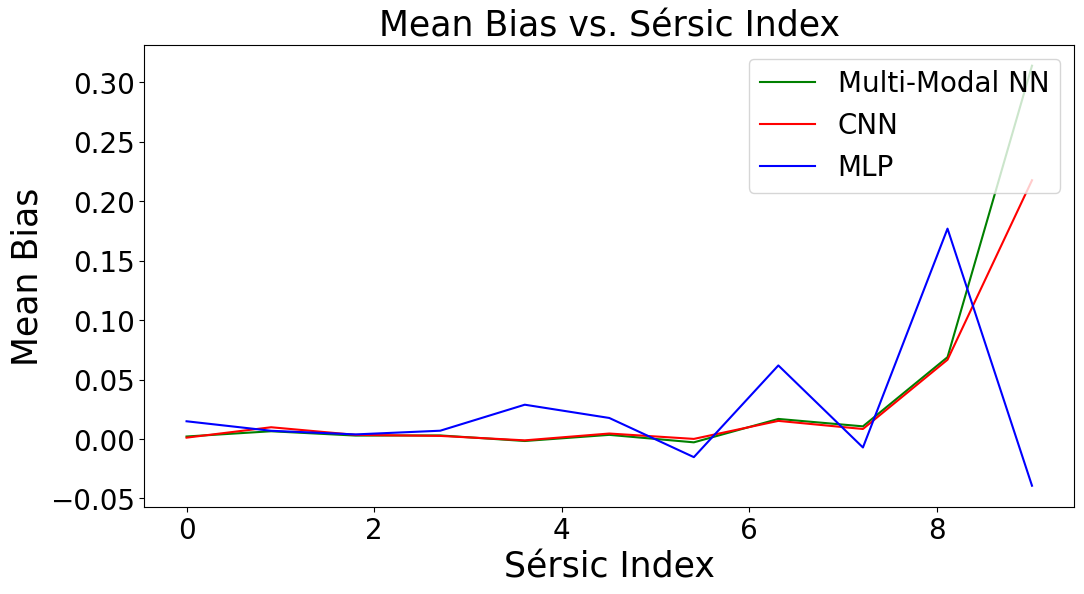

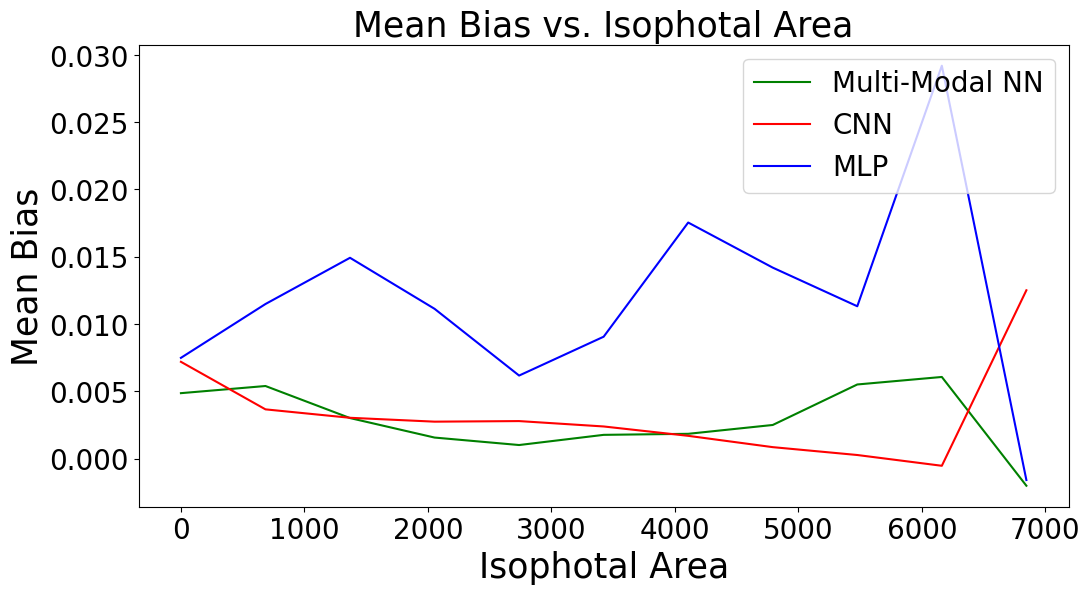

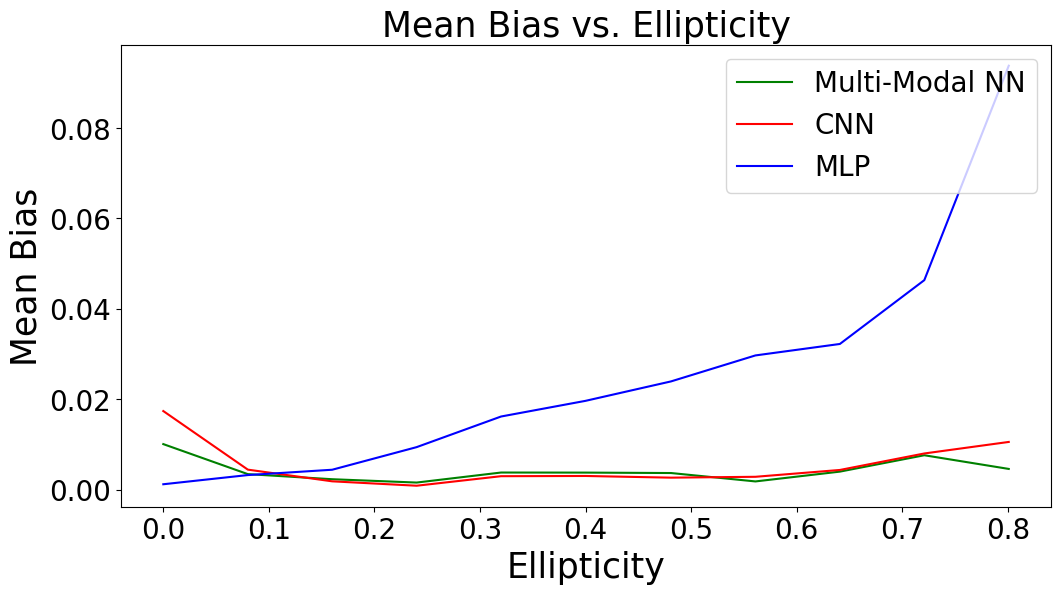

In [15]:
NBINS = 10
for i, shape_param in enumerate(shape_params):
    fig, axs = plt.subplots(figsize=(12, 6))
    for j, df in enumerate(models):
        nbins = NBINS + 1
        step = (df[shape_param].max() - df[shape_param].min()) / (nbins)
        bins = np.arange(df[shape_param].min(), df[shape_param].max() + step, step)
        df[f'{shape_param}_bins'] = pd.cut(df[shape_param], bins=bins)
        bin_mean = df.groupby(f'{shape_param}_bins')['bias'].mean()
        axs.plot(bin_mean.index.to_series().apply(lambda x: x.left), bin_mean.values, color=colors[j], linestyle='solid', label=f'{model_names[j]}')
        
    axs.legend(loc='upper right', fontsize=20)
    axs.set_title(f'Mean Bias vs. {shape_param_names[i]}', fontsize=25)
    axs.set_xlabel(shape_param_names[i], fontsize=25)
    axs.set_ylabel('Mean Bias', fontsize=25)
    axs.tick_params(axis='x', labelsize=20)
    axs.tick_params(axis='y', labelsize=20)
    plt.show()